In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
dset = pd.read_csv(r"C:\Users\user\Downloads\GroupProject H(Stat)\Dataset\Maternal Health Risk Data Set.csv")
dset

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [28]:
data_range = dset.describe().loc[['min', 'max']]
data_range

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
min,10.0,70.0,49.0,6.0,98.0,7.0
max,70.0,160.0,100.0,19.0,103.0,90.0


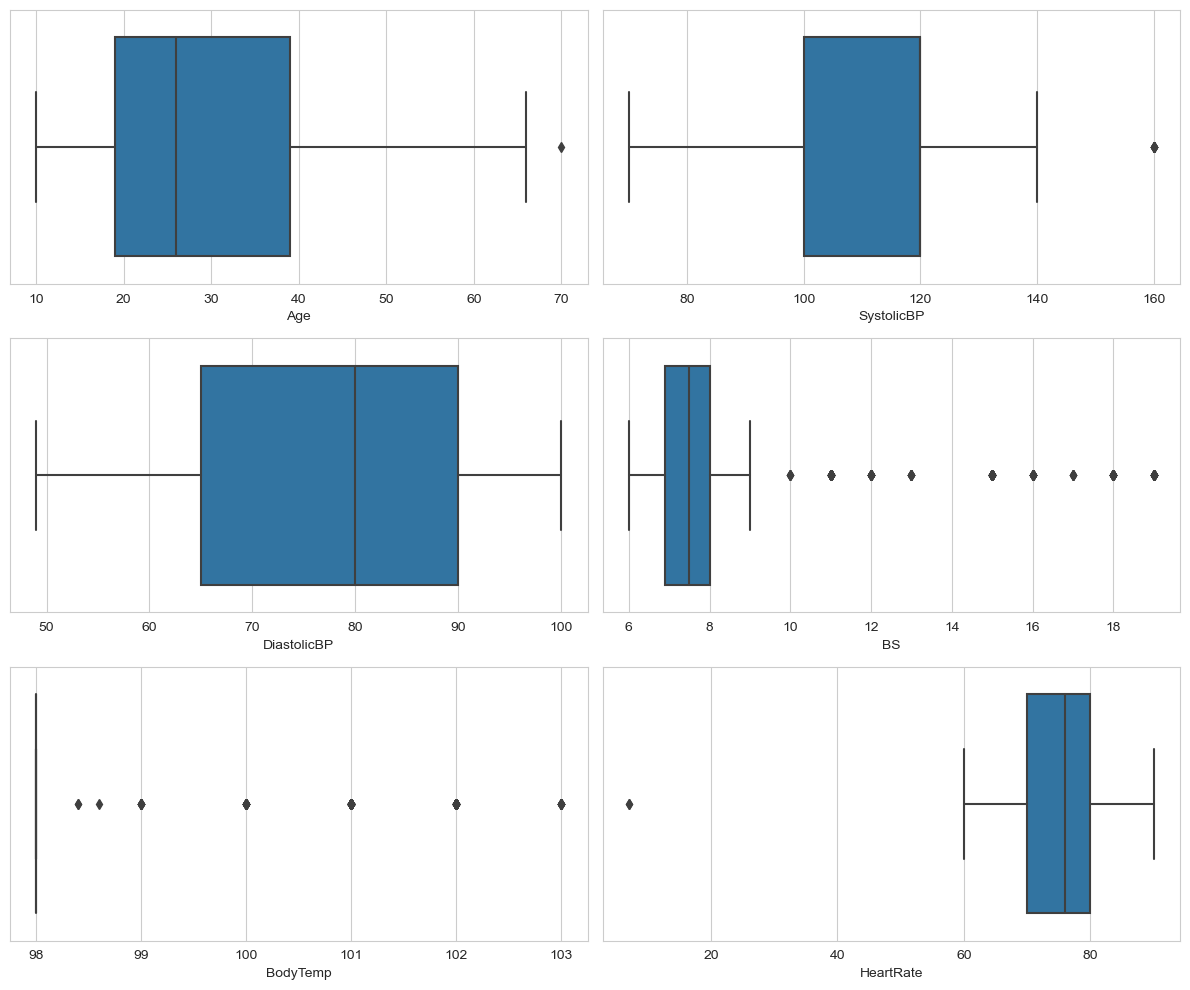

In [9]:
plt.figure(figsize=(12, 10))
sns.set_style("whitegrid")

plt.subplot(3, 2, 1)
sns.boxplot(x='Age', data=dset)

plt.subplot(3, 2, 2)
sns.boxplot(x='SystolicBP', data=dset)

plt.subplot(3, 2, 3)
sns.boxplot(x='DiastolicBP', data=dset)

plt.subplot(3, 2, 4)
sns.boxplot(x='BS', data=dset)

plt.subplot(3, 2, 5)
sns.boxplot(x='BodyTemp', data=dset)

plt.subplot(3, 2, 6)
sns.boxplot(x='HeartRate', data=dset)

plt.tight_layout()
plt.show()

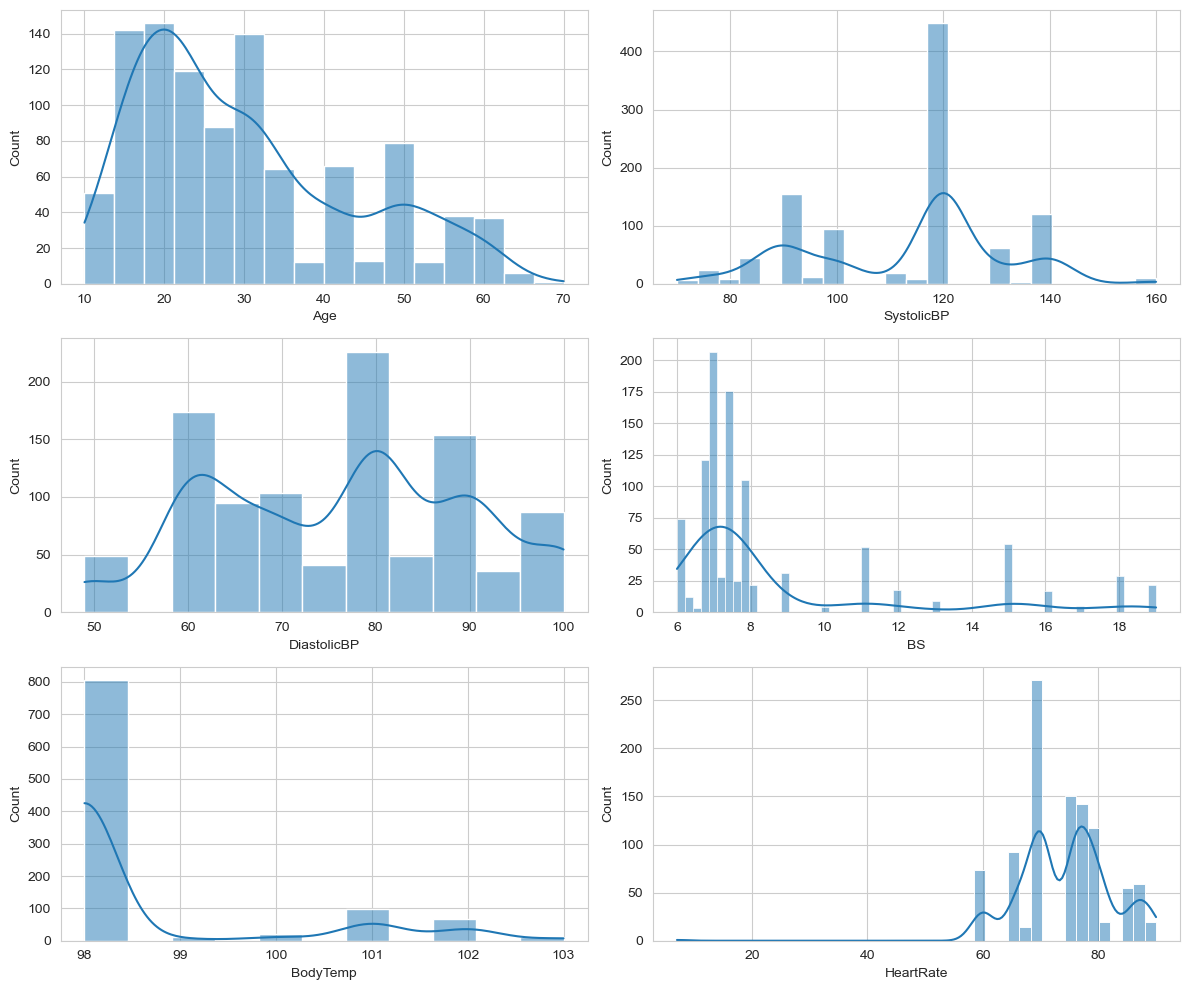

In [10]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
sns.histplot(dset['Age'], kde=True)

plt.subplot(3, 2, 2)
sns.histplot(dset['SystolicBP'], kde=True)

plt.subplot(3, 2, 3)
sns.histplot(dset['DiastolicBP'], kde=True)

plt.subplot(3, 2, 4)
sns.histplot(dset['BS'], kde=True)

plt.subplot(3, 2, 5)
sns.histplot(dset['BodyTemp'], kde=True)

plt.subplot(3, 2, 6)
sns.histplot(dset['HeartRate'], kde=True)

plt.tight_layout()
plt.show()

In [15]:
X = dset.drop('RiskLevel', axis=1)
y = dset['RiskLevel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = GaussianNB()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5763546798029556

Classification Report:
              precision    recall  f1-score   support

   high risk       0.79      0.64      0.71        47
    low risk       0.52      0.91      0.66        80
    mid risk       0.56      0.18      0.28        76

    accuracy                           0.58       203
   macro avg       0.62      0.58      0.55       203
weighted avg       0.60      0.58      0.53       203


Confusion Matrix:
[[30 11  6]
 [ 2 73  5]
 [ 6 56 14]]


In [17]:
X = dset.drop('RiskLevel', axis=1)
y = dset['RiskLevel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8177339901477833

Classification Report:
              precision    recall  f1-score   support

   high risk       0.87      0.85      0.86        47
    low risk       0.86      0.78      0.82        80
    mid risk       0.75      0.84      0.80        76

    accuracy                           0.82       203
   macro avg       0.83      0.82      0.82       203
weighted avg       0.82      0.82      0.82       203


Confusion Matrix:
[[40  1  6]
 [ 3 62 15]
 [ 3  9 64]]


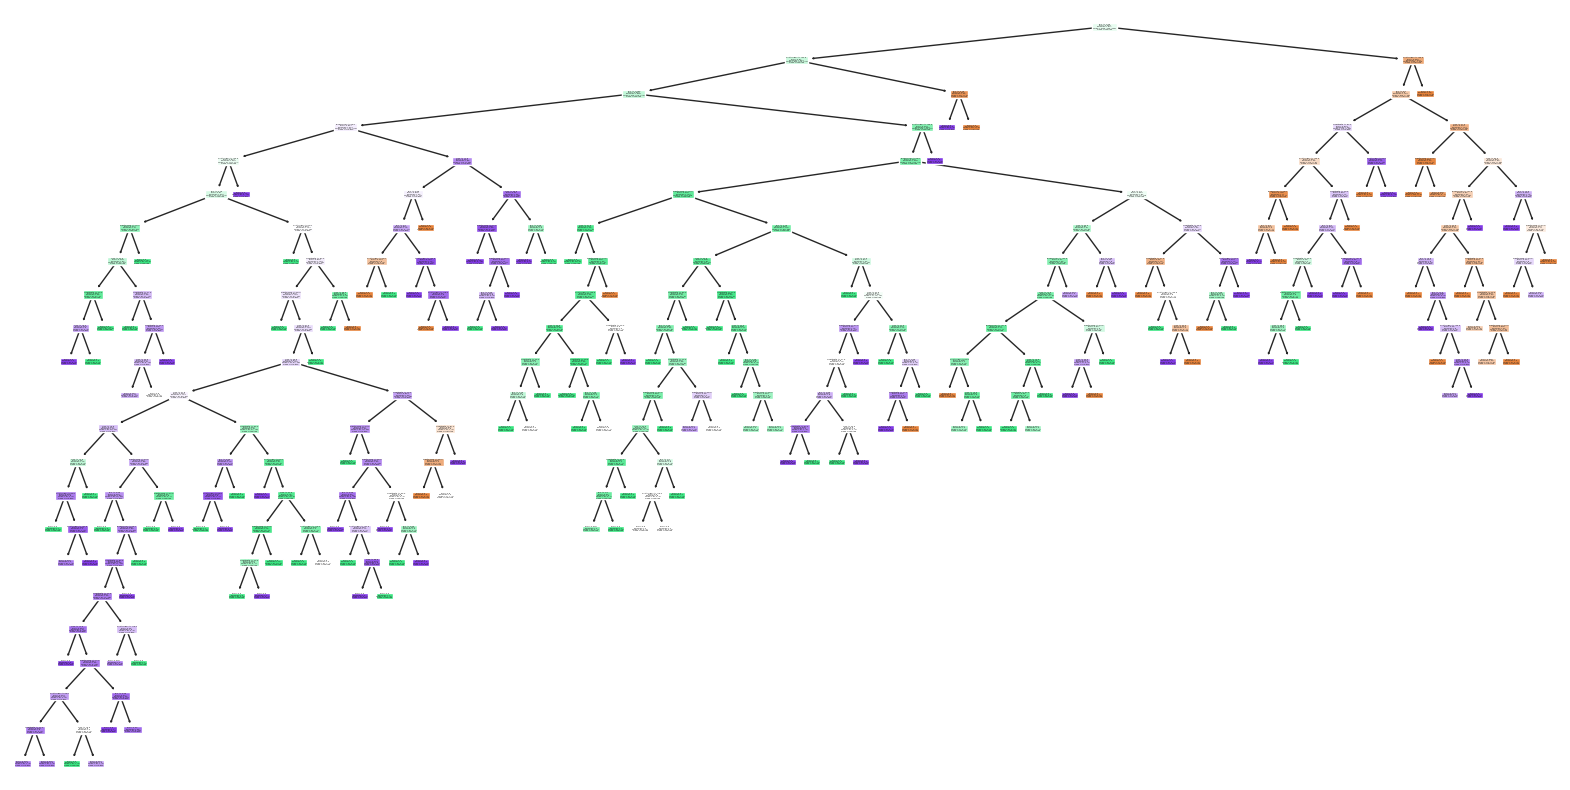

In [22]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=list(X.columns), class_names=list(clf.classes_), filled=True)
plt.show()